Gus Marquez DS687

Captain's ImageAI Model Trainer

(Help for these code can be found in ImageAI)

Google Drive Mounted /content/drive/MyDrive/colab/

LOAD LIBRARIES and SETUP

This is the standard code from ImageAI for model Builder

In [5]:
# Next model trainer and model type
# 4 models types available, 
# MobileNetv2, ResNet50, InceptionV3 and DenseNet121
# I took ResNet50

from imageai.Classification.Custom import ClassificationModelTrainer

model_trainer = ClassificationModelTrainer()
model_trainer.setModelTypeAsResNet50()
model_trainer.setDataDirectory(r"/content/drive/MyDrive/colab/minitrfdat")
model_trainer.trainModel(num_objects=4, num_experiments=20, enhance_data=True, batch_size=32, show_network_summary=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

Using Enhanced Data Generation
Found 2400 images belonging to 4 classes.
Found 480 images belonging to 4 classes.
JSON Mapping for the model classes saved to  /content/drive/MyDrive/colab/minitrfdat/json/model_class.json
Number of experiments (Epochs) :  20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
75/75 [==============================] - 822s 11s/step - loss: 2.2827 - accuracy: 0.4694 - val_loss: 6.4323 - val_accuracy: 0.2396

Epoch 00001: accuracy improved from -inf to 0.56667, saving model to /content/drive/MyDrive/colab/minitrfdat/models/model_ex-001_acc-0.566667.h5
Epoch 2/20
75/75 [==============================] - 46s 608ms/step - loss: 0.9526 - accuracy: 0.6436 - val_loss: 2.8792 - val_accuracy: 0.2500

Epoch 00002: accuracy improved from 0.56667 to 0.64500, saving model to /content/drive/MyDrive/colab/minitrfdat/models/model_ex-002_acc-0.645000.h5
Epoch 3/20
75/75 [==============================] - 47s 621ms/step - loss: 0.8311 - accuracy: 0.6862 - val_loss: 4.2671 - val_accuracy: 0.2500

Epoch 00003: accuracy improved from 0.64500 to 0.69750, saving model to /content/drive/MyDrive/colab/minitrfdat/models/model_ex-003_acc-0.697500.h5
Epoch 4/20
75/75 [==============================] - 44s 589ms/step - loss: 0.7614 - accuracy: 0.7069 - val_loss: 11.7538 - val_a

In [6]:
####   LOAD OWN MODEL

from imageai.Classification.Custom import CustomImageClassification
import os

execution_path = os.getcwd()

prediction = CustomImageClassification()
prediction.setModelTypeAsResNet50()
prediction.setModelPath(os.path.join(execution_path, "/content/drive/MyDrive/colab/minitrfdat/models/model_ex-018_acc-0.958333.h5"))
prediction.setJsonPath(os.path.join(execution_path, "/content/drive/MyDrive/colab/minitrfdat/json/model_class.json"))
prediction.loadModel(num_objects=4)


/content/drive/MyDrive/colab/ut09.jpg


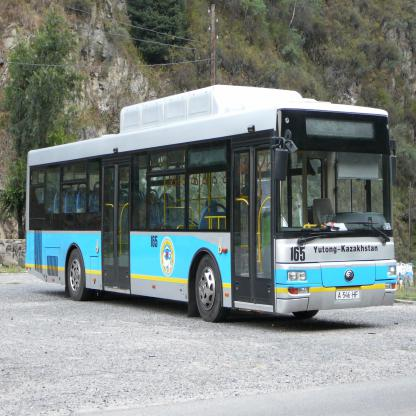

Bus  :  100.0
Truck  :  0.0
People  :  0.0
Car  :  0.0


In [7]:
import cv2
from google.colab.patches import cv2_imshow

# Loop the image
#x=9
#for i in range(x):
  #imagex = "ut0" + str(i+1) + ".jpg"
  #pathx =  "/content/drive/MyDrive/colab/testdata/" + imagex
  #imgdisplay = cv2.imread(pathx)
  #print(pathx)

pathx = "/content/drive/MyDrive/colab/ut09.jpg"
imgdisplay = cv2.imread(pathx)
print(pathx)
cv2_imshow(imgdisplay)  
predictions, probabilities = prediction.classifyImage(os.path.join(execution_path, pathx), result_count=5)
for eachPrediction, eachProbability in zip(predictions, probabilities):
    print(eachPrediction , " : " , eachProbability)
